In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# load results
data = pd.read_csv("../data/final_xlk_data.csv")
# filter from 2013-09 to 2021-12
data = data[(data["Date"] >= "2013-09-01") & (data["Date"] <= "2021-12-01")]
# Convert Date column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

In [53]:
# Define the fixed investment amount
fixed_investment = 1000  # Amount to invest each month

# Create a DataFrame for cumulative returns
investment_results = []  # To store cumulative returns
cumulative_return = 0.0  # Start with zero cumulative return

# Sort the data by Date
data = data.sort_values("Date").reset_index(drop=True)

# Loop through each month and calculate cumulative returns
for i in range(len(data)):
    monthly_return = float(data.loc[i, "Risk_Premium"])  # Ensure scalar value
    
    # Calculate total return from the fixed investment
    cumulative_return += monthly_return * fixed_investment
    
    # Store the result for this month
    investment_results.append({
        "month": data.loc[i, "Date"],
        "cumulative_return": cumulative_return
    })

# Convert results to DataFrame
investment_df = pd.DataFrame(investment_results)

# join data
data = data.rename(columns={'Date': 'month'})
investment_df = pd.merge(data,investment_df, on='month', how='left')

# Ensure data types are correct for plotting
investment_df["month"] = pd.to_datetime(investment_df["month"])  # Convert month column to datetime
investment_df["cumulative_return"] = investment_df["cumulative_return"].astype(float)  # Ensure numeric type

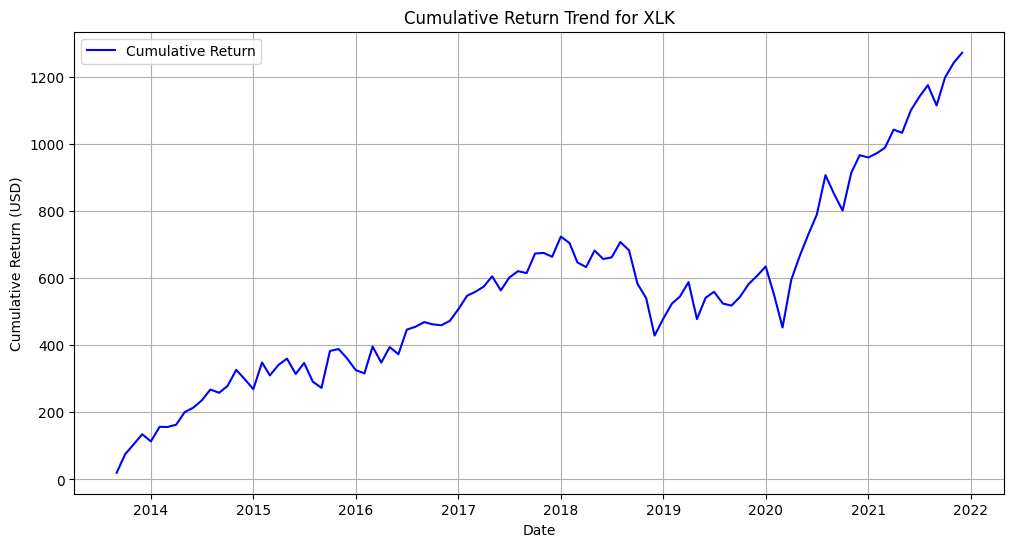

In [54]:
# Plot cumulative return trend
plt.figure(figsize=(12, 6))
plt.plot(investment_df["month"].values, investment_df["cumulative_return"].values, label="Cumulative Return", color='blue')
plt.xlabel("Date")
plt.ylabel("Cumulative Return (USD)")
plt.title("Cumulative Return Trend for XLK")
plt.legend()
plt.grid()
plt.show()

In [55]:
# LSTM portfolio
lstm_results_df = pd.read_csv("../data/model_results/lstm_results.csv")

# Calculate cumulative returns for a portfolio comprising top 10% stocks each month
fixed_investment = 1000  # Amount to invest each month

# Create a DataFrame for cumulative returns
lstm_investment_results = []  # To store cumulative returns
lstm_cumulative_return = 0.0  # Start with zero cumulative return

# Loop through each month in the test period
for month in range(100):
    # Select the stocks for the current month
    current_month_stocks = lstm_results_df[lstm_results_df['Month'] == month]
    
    if not current_month_stocks.empty:
        # Select the top 10% stocks based on predicted returns
        top_10_percent_threshold = current_month_stocks['y_pred'].quantile(0.90)
        current_top_stocks = current_month_stocks[current_month_stocks['y_pred'] >= top_10_percent_threshold]

        # Use the risk premium as the monthly return
        monthly_returns = current_top_stocks['y_test'].values
        
        # Calculate the average risk premium of the selected top stocks
        if len(monthly_returns) > 0:
            average_monthly_return = monthly_returns.mean()  # Average risk premium
            
            # Calculate total return from the fixed investment
            lstm_cumulative_return += average_monthly_return * fixed_investment

            # Store the result for this month
            lstm_investment_results.append({
                'month': month,
                'lstm_avg_monthly_return': average_monthly_return,
                'lstm_cumulative_return': lstm_cumulative_return
            })

# Convert results to DataFrame
lstm_investment_df = pd.DataFrame(lstm_investment_results)

# Display cumulative returns
print(lstm_investment_df)

    month  lstm_avg_monthly_return  lstm_cumulative_return
0       0                 0.044747               44.747116
1       1                 0.056484              101.230880
2       2                 0.101906              203.137134
3       3                 0.053898              257.035285
4       4                 0.006448              263.483423
..    ...                      ...                     ...
95     95                 0.040119             1925.245627
96     96                -0.054940             1870.305186
97     97                 0.030865             1901.169725
98     98                -0.050936             1850.234042
99     99                -0.018084             1832.150469

[100 rows x 3 columns]


In [56]:
# OLS portfolio
ols_results_df = pd.read_csv("../data/model_results/ols_results.csv")

# Define the fixed investment amount
fixed_investment = 1000  # Amount to invest each month

# Create a DataFrame for cumulative returns
ols_investment_results = []  # To store cumulative returns
ols_cumulative_return = 0.0  # Start with zero cumulative return

# Loop through each unique month in the results
for month in sorted(ols_results_df['start_month'].unique()):
    # Select the stocks for the current month
    current_month_stocks = ols_results_df[ols_results_df['start_month'] == month]

    if not current_month_stocks.empty:
        # Select the top 10% stocks based on predicted returns
        top_10_percent_threshold = current_month_stocks['predicted_return'].quantile(0.90)
        current_top_stocks = current_month_stocks[current_month_stocks['predicted_return'] >= top_10_percent_threshold]

        # Use the risk premium as the monthly return
        monthly_returns = current_top_stocks['actual_return'].values
        
        # Calculate the average risk premium of the selected top stocks
        if len(monthly_returns) > 0:
            average_monthly_return = monthly_returns.mean()  # Average risk premium
            
            # Calculate total return from the fixed investment
            ols_cumulative_return += average_monthly_return * fixed_investment

            # Store the result for this month
            ols_investment_results.append({
                'month': month,
                'ols_avg_monthly_return': average_monthly_return,
                'ols_cumulative_return': ols_cumulative_return
            })

# Convert results to DataFrame
ols_investment_df = pd.DataFrame(ols_investment_results)

# Display cumulative returns
print(ols_investment_df)

    month  ols_avg_monthly_return  ols_cumulative_return
0       0                0.094119              94.118558
1       1                0.119883             214.001984
2       2                0.149717             363.718987
3       3               -0.030890             332.828829
4       4                0.163463             496.291529
..    ...                     ...                    ...
95     95                0.030666            4823.346144
96     96                0.010097            4833.443067
97     97                0.005860            4839.302960
98     98                0.001285            4840.588415
99     99                0.054142            4894.730195

[100 rows x 3 columns]


In [57]:
# RF portfolio
rf_results_df = pd.read_csv("../data/model_results/random_forest_results.csv")

# Define the fixed investment amount
fixed_investment = 1000  # Amount to invest each month

# Create a DataFrame for cumulative returns
rf_investment_results = []  # To store cumulative returns
rf_cumulative_return = 0.0  # Start with zero cumulative return

# Loop through each unique month in the results
for month in sorted(rf_results_df['start_month'].unique()):
    # Select the stocks for the current month
    current_month_stocks = rf_results_df[rf_results_df['start_month'] == month]

    if not current_month_stocks.empty:
        # Select the top 10% stocks based on predicted returns
        top_10_percent_threshold = current_month_stocks['predicted_return'].quantile(0.90)
        current_top_stocks = current_month_stocks[current_month_stocks['predicted_return'] >= top_10_percent_threshold]

        # Use the risk premium as the monthly return
        monthly_returns = current_top_stocks['actual_return'].values
        
        # Calculate the average risk premium of the selected top stocks
        if len(monthly_returns) > 0:
            average_monthly_return = monthly_returns.mean()  # Average risk premium
            
            # Calculate total return from the fixed investment
            rf_cumulative_return += average_monthly_return * fixed_investment

            # Store the result for this month
            rf_investment_results.append({
                'month': month,
                'rf_avg_monthly_return': average_monthly_return,
                'rf_cumulative_return': rf_cumulative_return
            })

# Convert results to DataFrame
rf_investment_df = pd.DataFrame(rf_investment_results)

# Display cumulative returns
print(rf_investment_df)

    month  rf_avg_monthly_return  rf_cumulative_return
0       0               0.140175            140.174719
1       1               0.235611            375.785292
2       2               0.428544            804.328881
3       3               0.130745            935.074272
4       4               0.155519           1090.592786
..    ...                    ...                   ...
95     95               0.124890          14192.881038
96     96               0.150410          14343.290595
97     97               0.114075          14457.365744
98     98               0.106965          14564.331133
99     99               0.118338          14682.668788

[100 rows x 3 columns]


In [58]:
# GBRT portfolio
gbrt_results_df = pd.read_csv("../data/model_results/gbrt_results.csv")

# Define the fixed investment amount
fixed_investment = 1000  # Amount to invest each month

# Create a DataFrame for cumulative returns
gbrt_investment_results = []  # To store cumulative returns
gbrt_cumulative_return = 0.0  # Start with zero cumulative return

# Loop through each unique month in the results
for month in sorted(gbrt_results_df['start_month'].unique()):
    # Select the stocks for the current month
    current_month_stocks = gbrt_results_df[gbrt_results_df['start_month'] == month]

    if not current_month_stocks.empty:
        # Select the top 10% stocks based on predicted returns
        top_10_percent_threshold = current_month_stocks['predicted_return'].quantile(0.90)
        current_top_stocks = current_month_stocks[current_month_stocks['predicted_return'] >= top_10_percent_threshold]

        # Use the risk premium as the monthly return
        monthly_returns = current_top_stocks['actual_return'].values
        
        # Calculate the average risk premium of the selected top stocks
        if len(monthly_returns) > 0:
            average_monthly_return = monthly_returns.mean()  # Average risk premium
            
            # Calculate total return from the fixed investment
            gbrt_cumulative_return += average_monthly_return * fixed_investment

            # Store the result for this month
            gbrt_investment_results.append({
                'month': month,
                'gbrt_avg_monthly_return': average_monthly_return,
                'gbrt_cumulative_return': gbrt_cumulative_return
            })

# Convert results to DataFrame
gbrt_investment_df = pd.DataFrame(gbrt_investment_results)

# Display cumulative returns
print(gbrt_investment_df)

    month  gbrt_avg_monthly_return  gbrt_cumulative_return
0       0                 0.125040              125.039609
1       1                 0.161895              286.934985
2       2                 0.336877              623.811504
3       3                -0.045883              577.928790
4       4                 0.279588              857.516821
..    ...                      ...                     ...
95     95                 0.099490            11678.461342
96     96                 0.144216            11822.677813
97     97                 0.131359            11954.037014
98     98                 0.025893            11979.929910
99     99                 0.093219            12073.148627

[100 rows x 3 columns]


In [59]:
# join data
ml_investment_df=pd.merge(ols_investment_df,rf_investment_df, on='month', how='left')
ml_investment_df=pd.merge(ml_investment_df,lstm_investment_df, on='month', how='left')
ml_investment_df=pd.merge(ml_investment_df,gbrt_investment_df, on='month', how='left')

# Define the date range
date_range = pd.date_range(start='2013-09-01', end='2021-12-31', freq='MS')
# Add the datetime column
ml_investment_df['month'] = date_range

# join data
investment_df = pd.merge(investment_df,ml_investment_df, on='month', how='left')

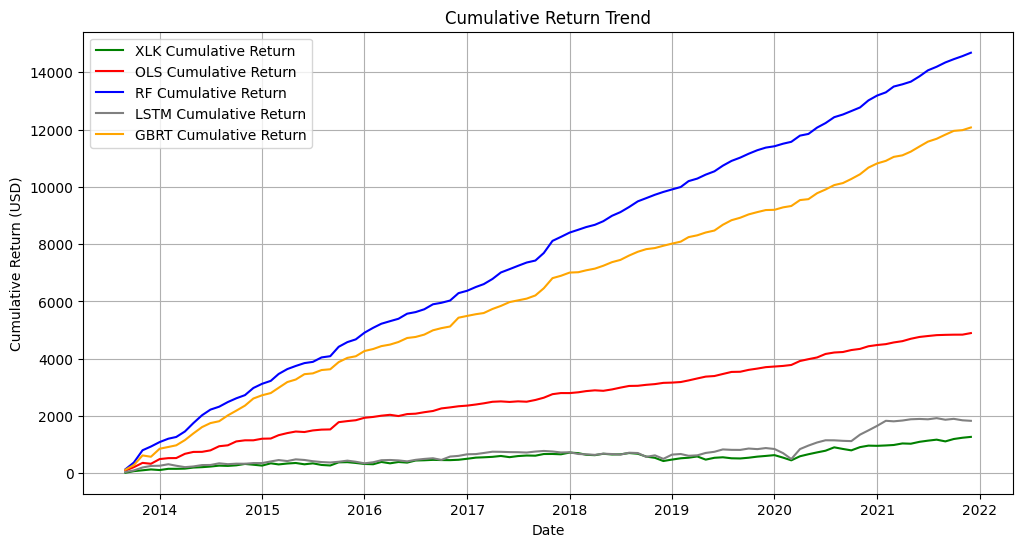

In [60]:
# Plot cumulative return trend
plt.figure(figsize=(12, 6))
plt.plot(investment_df["month"].values, investment_df["cumulative_return"].values, label="XLK Cumulative Return", color='green')
plt.plot(investment_df["month"].values, investment_df["ols_cumulative_return"].values, label="OLS Cumulative Return", color='red')
plt.plot(investment_df["month"].values, investment_df["rf_cumulative_return"].values, label="RF Cumulative Return", color='blue')
plt.plot(investment_df["month"].values, investment_df["lstm_cumulative_return"].values, label="LSTM Cumulative Return", color='grey')
plt.plot(investment_df["month"].values, investment_df["gbrt_cumulative_return"].values, label="GBRT Cumulative Return", color='orange')
plt.xlabel("Date")
plt.ylabel("Cumulative Return (USD)")
plt.title("Cumulative Return Trend")
plt.legend()
plt.grid()
plt.show()

In [61]:
# calculate annualized OOS Sharpe ratio for each portfolio
# Filter out rows where any value is NA
investment_df.dropna(inplace=True)

# Calculate annualized Sharpe ratio
def annualized_sharpe_ratio(excess_returns):
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns)
    return sharpe_ratio * np.sqrt(12)  # Annualizing by assuming monthly returns

# risk_free_rate = investment_df['3_Month_Treasury_Bill_Yield']

sharpe_ols = annualized_sharpe_ratio(investment_df['ols_avg_monthly_return'])
sharpe_rf = annualized_sharpe_ratio(investment_df['rf_avg_monthly_return'])
sharpe_lstm = annualized_sharpe_ratio(investment_df['lstm_avg_monthly_return'])
sharpe_gbrt = annualized_sharpe_ratio(investment_df['gbrt_avg_monthly_return'])
sharpe_xlk = annualized_sharpe_ratio(investment_df['Risk_Premium'])

print(f"Annualized Sharpe Ratios:\n OLS: {sharpe_ols}\n RF: {sharpe_rf}\n LSTM: {sharpe_lstm}\n GBRT: {sharpe_gbrt}\n XLK: {sharpe_xlk}")


Annualized Sharpe Ratios:
 OLS: 3.7587080626275227
 RF: 7.1078878830400365
 LSTM: 0.8852780310821414
 XLK: 0.915686297345189
